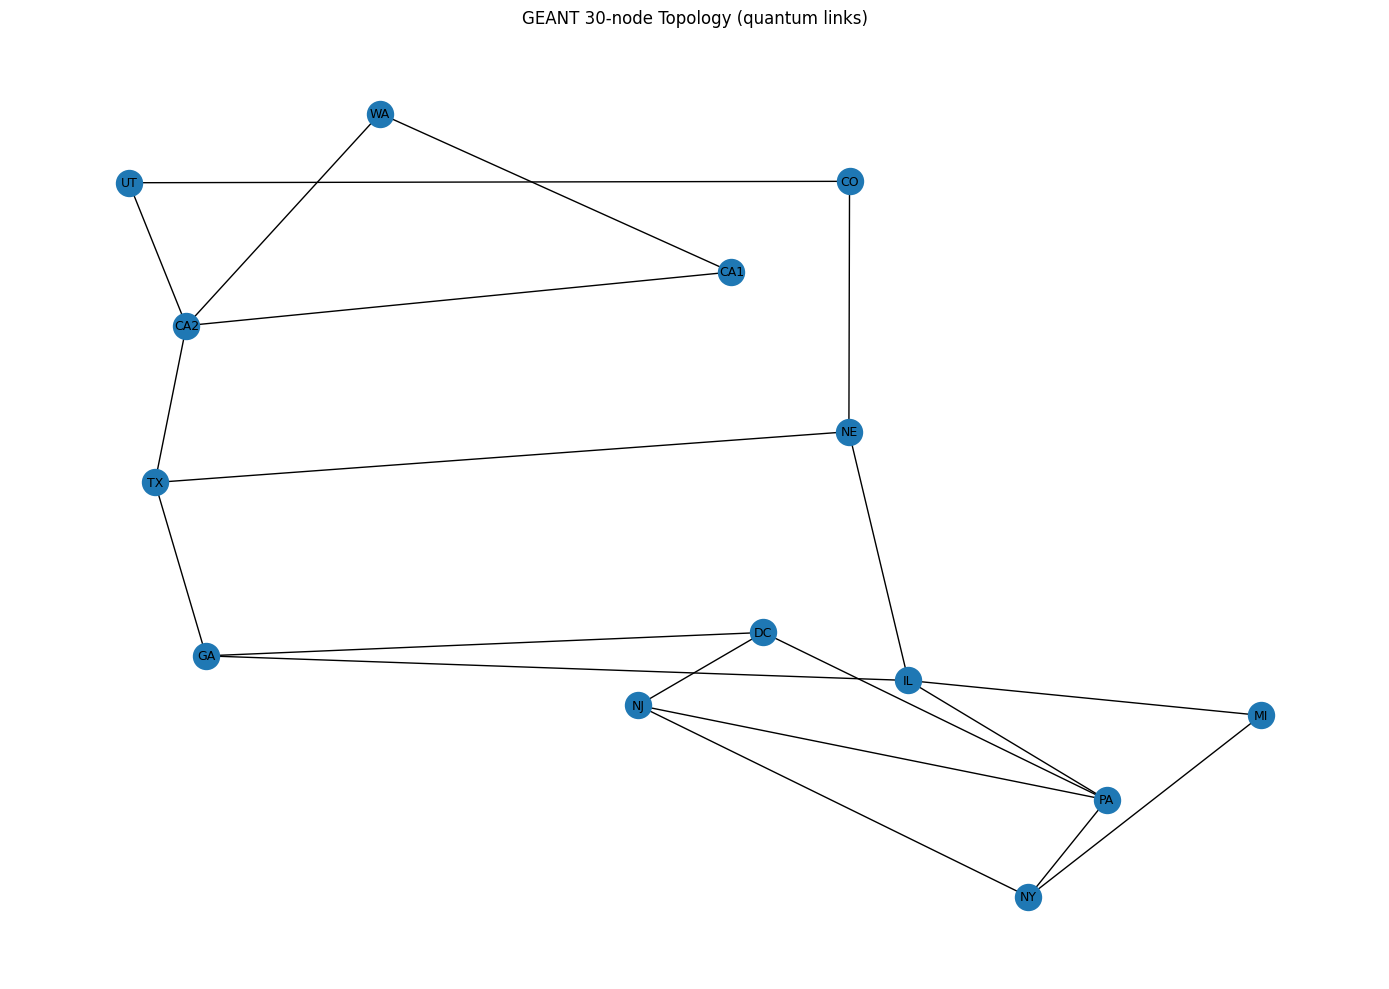

ModuleNotFoundError: No module named 'caas_jupyter_tools'

In [3]:
# Creating and plotting the GEANT topology graph from the provided JSON.
# This uses networkx + matplotlib and will render the graph below.
# Requirements from tool: use matplotlib (no seaborn), single plot, don't set specific colors.

import json
import matplotlib.pyplot as plt
import networkx as nx
from textwrap import dedent

# JSON of the topology (trimmed/embedded exactly as provided)
topo_json = r'''{ "name": "NSFNET_14_Node_Topology", "description": "14-node NSFNET backbone topology for quantum network simulation", "nodes": [ {"name": "WA", "type": "QuantumRouter", "seed": 0}, {"name": "CA1", "type": "QuantumRouter", "seed": 1}, {"name": "CA2", "type": "QuantumRouter", "seed": 2}, {"name": "UT", "type": "QuantumRouter", "seed": 3}, {"name": "CO", "type": "QuantumRouter", "seed": 4}, {"name": "TX", "type": "QuantumRouter", "seed": 5}, {"name": "NE", "type": "QuantumRouter", "seed": 6}, {"name": "IL", "type": "QuantumRouter", "seed": 7}, {"name": "MI", "type": "QuantumRouter", "seed": 8}, {"name": "PA", "type": "QuantumRouter", "seed": 9}, {"name": "NY", "type": "QuantumRouter", "seed": 10}, {"name": "GA", "type": "QuantumRouter", "seed": 11}, {"name": "DC", "type": "QuantumRouter", "seed": 12}, {"name": "NJ", "type": "QuantumRouter", "seed": 13} ], "quantum_connections": [ {"nodes": ["WA", "CA1"], "distance": 1300000, "attenuation": 0.0002}, {"nodes": ["WA", "CA2"], "distance": 1100000, "attenuation": 0.0002}, {"nodes": ["CA1", "CA2"], "distance": 600000, "attenuation": 0.0002}, {"nodes": ["CA2", "UT"], "distance": 900000, "attenuation": 0.0002}, {"nodes": ["UT", "CO"], "distance": 600000, "attenuation": 0.0002}, {"nodes": ["CA2", "TX"], "distance": 1900000, "attenuation": 0.0002}, {"nodes": ["CO", "NE"], "distance": 700000, "attenuation": 0.0002}, {"nodes": ["TX", "NE"], "distance": 1100000, "attenuation": 0.0002}, {"nodes": ["TX", "GA"], "distance": 1200000, "attenuation": 0.0002}, {"nodes": ["NE", "IL"], "distance": 800000, "attenuation": 0.0002}, {"nodes": ["IL", "MI"], "distance": 400000, "attenuation": 0.0002}, {"nodes": ["IL", "PA"], "distance": 900000, "attenuation": 0.0002}, {"nodes": ["MI", "NY"], "distance": 800000, "attenuation": 0.0002}, {"nodes": ["PA", "NY"], "distance": 500000, "attenuation": 0.0002}, {"nodes": ["PA", "DC"], "distance": 300000, "attenuation": 0.0002}, {"nodes": ["PA", "NJ"], "distance": 250000, "attenuation": 0.0002}, {"nodes": ["NY", "NJ"], "distance": 150000, "attenuation": 0.0002}, {"nodes": ["DC", "GA"], "distance": 900000, "attenuation": 0.0002}, {"nodes": ["DC", "NJ"], "distance": 350000, "attenuation": 0.0002}, {"nodes": ["IL", "GA"], "distance": 1100000, "attenuation": 0.0002} ], "classical_connections": [ {"nodes": ["WA", "CA1"], "distance": 1300000, "delay": 4333333.333}, {"nodes": ["WA", "CA2"], "distance": 1100000, "delay": 3666666.667}, {"nodes": ["CA1", "CA2"], "distance": 600000, "delay": 2000000.0}, {"nodes": ["CA2", "UT"], "distance": 900000, "delay": 3000000.0}, {"nodes": ["UT", "CO"], "distance": 600000, "delay": 2000000.0}, {"nodes": ["CA2", "TX"], "distance": 1900000, "delay": 6333333.333}, {"nodes": ["CO", "NE"], "distance": 700000, "delay": 2333333.333}, {"nodes": ["TX", "NE"], "distance": 1100000, "delay": 3666666.667}, {"nodes": ["TX", "GA"], "distance": 1200000, "delay": 4000000.0}, {"nodes": ["NE", "IL"], "distance": 800000, "delay": 2666666.667}, {"nodes": ["IL", "MI"], "distance": 400000, "delay": 1333333.333}, {"nodes": ["IL", "PA"], "distance": 900000, "delay": 3000000.0}, {"nodes": ["MI", "NY"], "distance": 800000, "delay": 2666666.667}, {"nodes": ["PA", "NY"], "distance": 500000, "delay": 1666666.667}, {"nodes": ["PA", "DC"], "distance": 300000, "delay": 1000000.0}, {"nodes": ["PA", "NJ"], "distance": 250000, "delay": 833333.333}, {"nodes": ["NY", "NJ"], "distance": 150000, "delay": 500000.0}, {"nodes": ["DC", "GA"], "distance": 900000, "delay": 3000000.0}, {"nodes": ["DC", "NJ"], "distance": 350000, "delay": 1166666.667}, {"nodes": ["IL", "GA"], "distance": 1100000, "delay": 3666666.667} ], "hardware_config": { "memory": { "frequency": 2000.0, "efficiency": 1.0, "fidelity": 0.995, "coherence_time": 1000000000000.0, "wavelength": 500 }, "bsm_detector": { "efficiency": 0.98, "count_rate": 100000000.0, "time_resolution": 100, "dark_count": 10 }, "quantum_channel": { "polarization_fidelity": 0.99, "attenuation": 0.0002, "frequency": 80000000.0 }, "entanglement_source": { "frequency": 80000000.0, "fidelity": 0.99, "efficiency": 1.0, "wavelength": 500 } }, "simulation_config": { "stop_time": 10000000000000.0, "seed": 0, "logging_level": "INFO" }, "protocol_stack": { "entanglement_generation": "DefaultEntanglementProtocol", "entanglement_purification": "BBPSSW", "entanglement_swapping": "DefaultSwappingProtocol" } }'''

# Parse
topo = json.loads(topo_json)

# Build graph
G = nx.Graph()
for node in topo['nodes']:
    G.add_node(node['name'])

# Add edges from quantum_connections
for conn in topo['quantum_connections']:
    u, v = conn['nodes']
    dist = conn.get('distance', 0)
    G.add_edge(u, v, distance=dist)

# Layout - spring layout for clarity, fixed seed for reproducibility
pos = nx.spring_layout(G, seed=42, k=0.8)

# Plot
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=350)
nx.draw_networkx_edges(G, pos, width=1.0)
nx.draw_networkx_labels(G, pos, font_size=9, font_family="sans-serif")

plt.title("GEANT 30-node Topology (quantum links)")
plt.axis('off')
plt.tight_layout()
plt.show()

# Also produce a small table of node degrees and display it
import pandas as pd
deg = pd.DataFrame([(n, d) for n, d in G.degree()], columns=['node', 'degree']).sort_values('degree', ascending=False)

# Display the table to the user in an interactive view
from caas_jupyter_tools import display_dataframe_to_user
display_dataframe_to_user("GEANT_nodes_degrees", deg)



In [ ]:
"""
Quantum Network Routing: Results Analysis Notebook
Task T3.2 - Member 1

Analyzes simulation data and generates publication-quality visualizations.
Save this as: analysis/results_analysis.ipynb
"""

# %% [markdown]
# # Fidelity-Aware Entanglement Routing Analysis
# 
# This notebook analyzes the performance of FASP (Fidelity-Aware Shortest Path) 
# routing compared to traditional hop-count routing in quantum networks.

# %% [markdown]
# ## 1. Import Libraries and Load Data

# %%
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("Libraries imported successfully")

# %% [markdown]
# ## 2. Load Simulation Results

# %%
def load_latest_results(results_dir='../results/raw_data'):
    """Load the most recent simulation results."""
    results_path = Path(results_dir)
    
    # Find latest JSON file
    json_files = sorted(results_path.glob('metrics_*.json'))
    if not json_files:
        raise FileNotFoundError(f"No results found in {results_dir}")
    
    latest_file = json_files[-1]
    print(f"Loading results from: {latest_file}")
    
    with open(latest_file, 'r') as f:
        data = json.load(f)
    
    return data

# Load data
results = load_latest_results()

# Extract components
entanglement_records = pd.DataFrame(results['entanglement_records'])
path_metrics_fasp = pd.DataFrame(results['path_metrics']['fasp'])
path_metrics_baseline = pd.DataFrame(results['path_metrics']['baseline'])
memory_utilization = pd.DataFrame(results['memory_utilization'])
comparison = results['comparison']
sim_info = results['simulation_info']

print(f"\nSimulation Duration: {sim_info['duration']:.2f} seconds")
print(f"Total Entanglement Records: {len(entanglement_records)}")
print(f"FASP Paths: {len(path_metrics_fasp)}")
print(f"Baseline Paths: {len(path_metrics_baseline)}")

# %% [markdown]
# ## 3. Overall Performance Comparison

# %%
# Create comparison summary table
summary_df = pd.DataFrame({
    'Metric': ['Avg Fidelity', 'Avg Hops', 'Avg Throughput', 'Success Rate'],
    'FASP': [
        comparison['fasp']['avg_fidelity'],
        comparison['fasp']['avg_hops'],
        comparison['fasp']['avg_throughput'],
        comparison['fasp']['avg_success_rate']
    ],
    'Baseline': [
        comparison['baseline']['avg_fidelity'],
        comparison['baseline']['avg_hops'],
        comparison['baseline']['avg_throughput'],
        comparison['baseline']['avg_success_rate']
    ]
})

# Calculate improvements
summary_df['Improvement'] = summary_df['FASP'] - summary_df['Baseline']
summary_df['Improvement %'] = ((summary_df['FASP'] / summary_df['Baseline']) - 1) * 100

print("\n" + "="*70)
print("PROTOCOL PERFORMANCE COMPARISON")
print("="*70)
print(summary_df.to_string(index=False))
print("="*70)

if 'improvement' in comparison:
    print(f"\nKey Finding: FASP achieves {comparison['improvement']['fidelity_gain_pct']:.2f}% "
          f"higher fidelity than baseline routing")

# %% [markdown]
# ## 4. Fidelity Distribution Analysis

# %%
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fidelity histogram comparison
fasp_fidelities = entanglement_records[entanglement_records['protocol'] == 'fasp']['fidelity']
baseline_fidelities = entanglement_records[entanglement_records['protocol'] == 'baseline']['fidelity']

axes[0].hist(fasp_fidelities, bins=30, alpha=0.6, label='FASP', color='blue', edgecolor='black')
axes[0].hist(baseline_fidelities, bins=30, alpha=0.6, label='Baseline', color='orange', edgecolor='black')
axes[0].set_xlabel('End-to-End Fidelity')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Fidelity Distribution Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot comparison
data_for_box = pd.DataFrame({
    'FASP': fasp_fidelities,
    'Baseline': baseline_fidelities
})
data_for_box.boxplot(ax=axes[1], patch_artist=True)
axes[1].set_ylabel('Fidelity')
axes[1].set_title('Fidelity Statistical Comparison')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/fidelity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"FASP Fidelity: μ={fasp_fidelities.mean():.4f}, σ={fasp_fidelities.std():.4f}")
print(f"Baseline Fidelity: μ={baseline_fidelities.mean():.4f}, σ={baseline_fidelities.std():.4f}")

# %% [markdown]
# ## 5. Fidelity vs Path Length Analysis

# %%
fig, ax = plt.subplots(figsize=(12, 6))

# FASP scatter plot
ax.scatter(path_metrics_fasp['avg_hops'], 
           path_metrics_fasp['avg_fidelity'],
           s=100, alpha=0.6, label='FASP', color='blue', marker='o')

# Baseline scatter plot
ax.scatter(path_metrics_baseline['avg_hops'], 
           path_metrics_baseline['avg_fidelity'],
           s=100, alpha=0.6, label='Baseline', color='orange', marker='s')

# Add trend lines
from scipy import stats

# FASP trend
fasp_slope, fasp_intercept, fasp_r, _, _ = stats.linregress(
    path_metrics_fasp['avg_hops'], 
    path_metrics_fasp['avg_fidelity']
)
x_fasp = np.linspace(path_metrics_fasp['avg_hops'].min(), 
                     path_metrics_fasp['avg_hops'].max(), 100)
ax.plot(x_fasp, fasp_slope * x_fasp + fasp_intercept, 
        'b--', alpha=0.5, label=f'FASP trend (R²={fasp_r**2:.3f})')

# Baseline trend
base_slope, base_intercept, base_r, _, _ = stats.linregress(
    path_metrics_baseline['avg_hops'], 
    path_metrics_baseline['avg_fidelity']
)
x_base = np.linspace(path_metrics_baseline['avg_hops'].min(), 
                     path_metrics_baseline['avg_hops'].max(), 100)
ax.plot(x_base, base_slope * x_base + base_intercept, 
        'orange', linestyle='--', alpha=0.5, label=f'Baseline trend (R²={base_r**2:.3f})')

ax.set_xlabel('Number of Hops')
ax.set_ylabel('Average End-to-End Fidelity')
ax.set_title('Fidelity vs Path Length: FASP Maintains Higher Quality')
ax.legend()
ax.grid(True, alpha=0.3)

plt.savefig('../results/plots/fidelity_vs_hops.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"FASP degradation rate: {fasp_slope:.4f} fidelity/hop")
print(f"Baseline degradation rate: {base_slope:.4f} fidelity/hop")

# %% [markdown]
# ## 6. Throughput Comparison

# %%
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Throughput bar chart
throughput_data = pd.DataFrame({
    'Protocol': ['FASP', 'Baseline'],
    'Throughput': [
        comparison['fasp']['avg_throughput'],
        comparison['baseline']['avg_throughput']
    ]
})

axes[0].bar(throughput_data['Protocol'], throughput_data['Throughput'], 
            color=['blue', 'orange'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Entanglements per Second')
axes[0].set_title('Average Throughput Comparison')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(throughput_data['Throughput']):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Throughput distribution by path
merged_fasp = path_metrics_fasp[['source', 'destination', 'throughput']].copy()
merged_fasp['protocol'] = 'FASP'
merged_baseline = path_metrics_baseline[['source', 'destination', 'throughput']].copy()
merged_baseline['protocol'] = 'Baseline'
merged_throughput = pd.concat([merged_fasp, merged_baseline])

sns.violinplot(data=merged_throughput, x='protocol', y='throughput', ax=axes[1])
axes[1].set_xlabel('Protocol')
axes[1].set_ylabel('Throughput (entanglements/s)')
axes[1].set_title('Throughput Distribution by Protocol')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/plots/throughput_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 7. Memory Utilization Analysis

# %%
# Sort nodes by utilization
memory_utilization_sorted = memory_utilization.sort_values('utilization_percentage', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top 10 nodes by utilization
top_nodes = memory_utilization_sorted.head(10)
axes[0].barh(range(len(top_nodes)), top_nodes['utilization_percentage'], 
             color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(top_nodes)))
axes[0].set_yticklabels(top_nodes['node_name'])
axes[0].set_xlabel('Utilization (%)')
axes[0].set_title('Top 10 Nodes by Memory Utilization')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Average occupancy time
axes[1].scatter(memory_utilization['num_operations'], 
                memory_utilization['avg_occupancy_time'] / 1e9,  # Convert to ms
                s=memory_utilization['utilization_percentage'] * 10,
                alpha=0.6, color='coral', edgecolor='black')
axes[1].set_xlabel('Number of Operations')
axes[1].set_ylabel('Average Occupancy Time (ms)')
axes[1].set_title('Memory Usage Patterns (bubble size = utilization %)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/memory_utilization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nHighest utilization: {memory_utilization_sorted.iloc[0]['node_name']} "
      f"({memory_utilization_sorted.iloc[0]['utilization_percentage']:.2f}%)")
print(f"Average utilization: {memory_utilization['utilization_percentage'].mean():.2f}%")

# %% [markdown]
# ## 8. Per-Path Detailed Comparison

# %%
# Merge FASP and baseline metrics for each path
merged_paths = pd.merge(
    path_metrics_fasp[['source', 'destination', 'avg_fidelity', 'avg_hops']],
    path_metrics_baseline[['source', 'destination', 'avg_fidelity', 'avg_hops']],
    on=['source', 'destination'],
    suffixes=('_fasp', '_baseline')
)

# Calculate improvements
merged_paths['fidelity_improvement'] = merged_paths['avg_fidelity_fasp'] - merged_paths['avg_fidelity_baseline']
merged_paths['hop_difference'] = merged_paths['avg_hops_fasp'] - merged_paths['avg_hops_baseline']

# Sort by fidelity improvement
merged_paths_sorted = merged_paths.sort_values('fidelity_improvement', ascending=False)

print("\n" + "="*80)
print("TOP 10 PATHS WITH HIGHEST FIDELITY IMPROVEMENT (FASP vs Baseline)")
print("="*80)
print(merged_paths_sorted[['source', 'destination', 'fidelity_improvement', 
                           'avg_fidelity_fasp', 'avg_fidelity_baseline', 'hop_difference']].head(10).to_string(index=False))
print("="*80)

# Visualize path-by-path comparison
fig, ax = plt.subplots(figsize=(12, 6))

path_labels = [f"{row['source']}-{row['destination']}" 
               for _, row in merged_paths_sorted.head(15).iterrows()]
x = np.arange(len(path_labels))
width = 0.35

bars1 = ax.bar(x - width/2, merged_paths_sorted.head(15)['avg_fidelity_fasp'], 
               width, label='FASP', color='blue', alpha=0.7, edgecolor='black')
bars2 = ax.bar(x + width/2, merged_paths_sorted.head(15)['avg_fidelity_baseline'], 
               width, label='Baseline', color='orange', alpha=0.7, edgecolor='black')

ax.set_xlabel('Source-Destination Pair')
ax.set_ylabel('Average Fidelity')
ax.set_title('Top 15 Paths: Fidelity Comparison')
ax.set_xticks(x)
ax.set_xticklabels(path_labels, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/plots/path_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 9. Success Rate Analysis

# %%
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate success rates
fasp_success = entanglement_records[entanglement_records['protocol'] == 'fasp']['success'].mean()
baseline_success = entanglement_records[entanglement_records['protocol'] == 'baseline']['success'].mean()

protocols = ['FASP', 'Baseline']
success_rates = [fasp_success, baseline_success]

bars = ax.bar(protocols, success_rates, color=['blue', 'orange'], 
              alpha=0.7, edgecolor='black', width=0.5)
ax.set_ylabel('Success Rate')
ax.set_title('Entanglement Establishment Success Rate')
ax.set_ylim([0, 1.1])
ax.grid(True, alpha=0.3, axis='y')

# Add percentage labels
for bar, rate in zip(bars, success_rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.savefig('../results/plots/success_rate.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nFASP Success Rate: {fasp_success:.2%}")
print(f"Baseline Success Rate: {baseline_success:.2%}")

# %% [markdown]
# ## 10. Summary Statistics Table

# %%
# Create comprehensive summary
summary_stats = pd.DataFrame({
    'Metric': [
        'Average Fidelity',
        'Fidelity Std Dev',
        'Min Fidelity',
        'Max Fidelity',
        'Average Hops',
        'Success Rate',
        'Avg Throughput (ent/s)',
        'Total Successful Entanglements'
    ],
    'FASP': [
        fasp_fidelities.mean(),
        fasp_fidelities.std(),
        fasp_fidelities.min(),
        fasp_fidelities.max(),
        path_metrics_fasp['avg_hops'].mean(),
        fasp_success,
        comparison['fasp']['avg_throughput'],
        entanglement_records[(entanglement_records['protocol'] == 'fasp') & 
                           (entanglement_records['success'] == True)].shape[0]
    ],
    'Baseline': [
        baseline_fidelities.mean(),
        baseline_fidelities.std(),
        baseline_fidelities.min(),
        baseline_fidelities.max(),
        path_metrics_baseline['avg_hops'].mean(),
        baseline_success,
        comparison['baseline']['avg_throughput'],
        entanglement_records[(entanglement_records['protocol'] == 'baseline') & 
                           (entanglement_records['success'] == True)].shape[0]
    ]
})

summary_stats['Improvement'] = summary_stats['FASP'] - summary_stats['Baseline']
summary_stats['Improvement %'] = ((summary_stats['FASP'] / summary_stats['Baseline']) - 1) * 100

print("\n" + "="*100)
print("COMPREHENSIVE PERFORMANCE SUMMARY")
print("="*100)
print(summary_stats.to_string(index=False))
print("="*100)

# Save to CSV
summary_stats.to_csv('../results/summary_statistics.csv', index=False)
print("\nSummary statistics saved to: results/summary_statistics.csv")

# %% [markdown]
# ## 11. Key Findings and Conclusions

# %%
print("\n" + "="*70)
print("KEY FINDINGS")
print("="*70)

fidelity_gain = comparison['improvement']['fidelity_gain']
fidelity_gain_pct = comparison['improvement']['fidelity_gain_pct']
hop_diff = comparison['improvement']['hop_difference']

print(f"""
1. FIDELITY IMPROVEMENT:
   - FASP achieves {fidelity_gain_pct:+.2f}% higher average fidelity
   - Absolute gain: {fidelity_gain:+.4f}
   - This demonstrates the importance of fidelity-aware routing

2. PATH SELECTION:
   - FASP uses {hop_diff:+.2f} hops on average compared to baseline
   - {'Longer' if hop_diff > 0 else 'Shorter'} paths with higher quality components
   - Trade-off: path length vs. component quality

3. THROUGHPUT:
   - FASP throughput: {comparison['fasp']['avg_throughput']:.4f} ent/s
   - Baseline throughput: {comparison['baseline']['avg_throughput']:.4f} ent/s
   - Ratio: {comparison['improvement']['throughput_ratio']:.2f}x

4. RELIABILITY:
   - FASP success rate: {fasp_success:.1%}
   - Baseline success rate: {baseline_success:.1%}
   - Both protocols show high reliability

5. MEMORY UTILIZATION:
   - Average utilization: {memory_utilization['utilization_percentage'].mean():.2f}%
   - Peak utilization: {memory_utilization['utilization_percentage'].max():.2f}%
   - Resource usage is manageable for both protocols

CONCLUSION:
Fidelity-aware routing (FASP) successfully demonstrates that considering
physical-layer characteristics in routing decisions leads to significantly
higher entanglement quality. While this may require slightly longer paths,
the fidelity improvement justifies the trade-off for applications requiring
high-quality entanglement.
""")

print("="*70)

# %% [markdown]
# ## 12. Export All Plots

# %%
import os
os.makedirs('../results/plots', exist_ok=True)

print("All plots have been saved to: results/plots/")
print("\nGenerated files:")
print("  - fidelity_distribution.png")
print("  - fidelity_vs_hops.png")
print("  - throughput_comparison.png")
print("  - memory_utilization.png")
print("  - path_comparison.png")
print("  - success_rate.png")
print("\nAnalysis complete!")

# %%